In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
pd.set_option('max_colwidth', 600)

In [2]:
survey_df = pd.read_csv("C:/Users/odunz/Downloads/Project 3/survey.csv")
survey_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [3]:
survey_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
survey_df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [5]:
emp_interview_df = survey_df.drop(['state', 'self_employed','Gender', 'family_history', 'treatment', 'work_interfere','remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'obs_consequence', 'comments'],axis=1)

In [6]:
employee_conditions_df = emp_interview_df.rename(columns = {'Timestamp': 'Years', 'Age': 'Age', 'Countries': 'Country', 'no_employees': '# of Employees', 'mental_health_interview': 'Mental Health Interview', 'phys_health_interview': 'Physical Health Interview', 'mental_vs_physical': 'Mental & Physical'})

employee_conditions_df.head()


,Years,Age,Country,# of Employees,Mental Health Interview,Physical Health Interview,Mental & Physical
0,2014-08-27 11:29:31,37,United States,6-25,No,Maybe,Yes
1,2014-08-27 11:29:37,44,United States,More than 1000,No,No,Don't know
2,2014-08-27 11:29:44,32,Canada,6-25,Yes,Yes,No
3,2014-08-27 11:29:46,31,United Kingdom,26-100,Maybe,Maybe,No
4,2014-08-27 11:30:22,31,United States,100-500,Yes,Yes,Don't know


In [7]:
employee_conditions_df.to_csv("C:/Users/odunz/Downloads/Project 3/Employees_condition.csv")
employee_conditions_df.head()


,Years,Age,Country,# of Employees,Mental Health Interview,Physical Health Interview,Mental & Physical
0,2014-08-27 11:29:31,37,United States,6-25,No,Maybe,Yes
1,2014-08-27 11:29:37,44,United States,More than 1000,No,No,Don't know
2,2014-08-27 11:29:44,32,Canada,6-25,Yes,Yes,No
3,2014-08-27 11:29:46,31,United Kingdom,26-100,Maybe,Maybe,No
4,2014-08-27 11:30:22,31,United States,100-500,Yes,Yes,Don't know


In [8]:
mental_physical_df = employee_conditions_df
mental_interview_df = employee_conditions_df
physical_interview_df = employee_conditions_df

In [9]:
len(mental_physical_df['Mental & Physical'].unique())

3

In [10]:
len(mental_interview_df['Mental Health Interview'].unique())

3

In [11]:
len(physical_interview_df['Physical Health Interview'].unique())

3

In [12]:
mental_physical_df.loc[(mental_physical_df['# of Employees']=="More than 1000")|(mental_physical_df['# of Employees']=="500-1000")]

,Years,Age,Country,# of Employees,Mental Health Interview,Physical Health Interview,Mental & Physical
1,2014-08-27 11:29:37,44,United States,More than 1000,No,No,Don't know
13,2014-08-27 11:33:26,36,United States,500-1000,No,No,Don't know
23,2014-08-27 11:36:24,41,United States,More than 1000,No,Yes,Don't know
25,2014-08-27 11:37:08,35,United States,More than 1000,No,Yes,No
32,2014-08-27 11:39:31,30,United Kingdom,500-1000,No,Yes,Don't know
...,...,...,...,...,...,...,...
1239,2015-04-04 11:22:05,30,Netherlands,500-1000,Maybe,Yes,Don't know
1243,2015-05-05 14:22:18,43,United States,More than 1000,No,No,Don't know
1244,2015-05-05 15:16:25,32,United Kingdom,More than 1000,No,Yes,No
1253,2015-08-25 19:59:38,36,United States,More than 1000,No,No,Don't know


In [13]:
split_column = mental_physical_df['Years'].str.split('-', expand = True)
split_column

,0,1,2
0,2014,08,27 11:29:31
1,2014,08,27 11:29:37
2,2014,08,27 11:29:44
3,2014,08,27 11:29:46
4,2014,08,27 11:30:22
...,...,...,...
1254,2015,09,12 11:17:21
1255,2015,09,26 01:07:35
1256,2015,11,07 12:36:58
1257,2015,11,30 21:25:06


In [14]:
split_column[0][0]

'2014'

In [15]:
mental_physical_df['Year'] = split_column[0]
mental_physical_df

,Years,Age,Country,# of Employees,Mental Health Interview,Physical Health Interview,Mental & Physical,Year
0,2014-08-27 11:29:31,37,United States,6-25,No,Maybe,Yes,2014
1,2014-08-27 11:29:37,44,United States,More than 1000,No,No,Don't know,2014
2,2014-08-27 11:29:44,32,Canada,6-25,Yes,Yes,No,2014
3,2014-08-27 11:29:46,31,United Kingdom,26-100,Maybe,Maybe,No,2014
4,2014-08-27 11:30:22,31,United States,100-500,Yes,Yes,Don't know,2014
...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,United Kingdom,26-100,No,No,Don't know,2015
1255,2015-09-26 01:07:35,32,United States,26-100,No,No,Yes,2015
1256,2015-11-07 12:36:58,34,United States,More than 1000,No,No,No,2015
1257,2015-11-30 21:25:06,46,United States,100-500,No,No,No,2015


In [16]:
year_condition_df = mental_physical_df.drop(columns = { 'Years'})
year_condition_df

,Age,Country,# of Employees,Mental Health Interview,Physical Health Interview,Mental & Physical,Year
0,37,United States,6-25,No,Maybe,Yes,2014
1,44,United States,More than 1000,No,No,Don't know,2014
2,32,Canada,6-25,Yes,Yes,No,2014
3,31,United Kingdom,26-100,Maybe,Maybe,No,2014
4,31,United States,100-500,Yes,Yes,Don't know,2014
...,...,...,...,...,...,...,...
1254,26,United Kingdom,26-100,No,No,Don't know,2015
1255,32,United States,26-100,No,No,Yes,2015
1256,34,United States,More than 1000,No,No,No,2015
1257,46,United States,100-500,No,No,No,2015


In [17]:
interview_question_df = mental_interview_df.groupby(["Country"]).count()["Mental Health Interview"]
interview_question2_df = physical_interview_df.groupby(["Country"]).count()["Physical Health Interview"]
interview_question_df

Country
Australia                  21
Austria                     3
Bahamas, The                1
Belgium                     6
Bosnia and Herzegovina      1
Brazil                      6
Bulgaria                    4
Canada                     72
China                       1
Colombia                    2
Costa Rica                  1
Croatia                     2
Czech Republic              1
Denmark                     2
Finland                     3
France                     13
Georgia                     1
Germany                    45
Greece                      2
Hungary                     1
India                      10
Ireland                    27
Israel                      5
Italy                       7
Japan                       1
Latvia                      1
Mexico                      3
Moldova                     1
Netherlands                27
New Zealand                 8
Nigeria                     1
Norway                      1
Philippines                 1
Po

In [18]:
year_condition_df.loc[(year_condition_df['# of Employees']=="More than 1000")|(year_condition_df['# of Employees']=="500-1000")]

,Age,Country,# of Employees,Mental Health Interview,Physical Health Interview,Mental & Physical,Year
1,44,United States,More than 1000,No,No,Don't know,2014
13,36,United States,500-1000,No,No,Don't know,2014
23,41,United States,More than 1000,No,Yes,Don't know,2014
25,35,United States,More than 1000,No,Yes,No,2014
32,30,United Kingdom,500-1000,No,Yes,Don't know,2014
...,...,...,...,...,...,...,...
1239,30,Netherlands,500-1000,Maybe,Yes,Don't know,2015
1243,43,United States,More than 1000,No,No,Don't know,2015
1244,32,United Kingdom,More than 1000,No,Yes,No,2015
1253,36,United States,More than 1000,No,No,Don't know,2015


In [19]:
year_condition_df.to_csv("C:/Users/odunz/Downloads/Project 3/listupdate.csv")

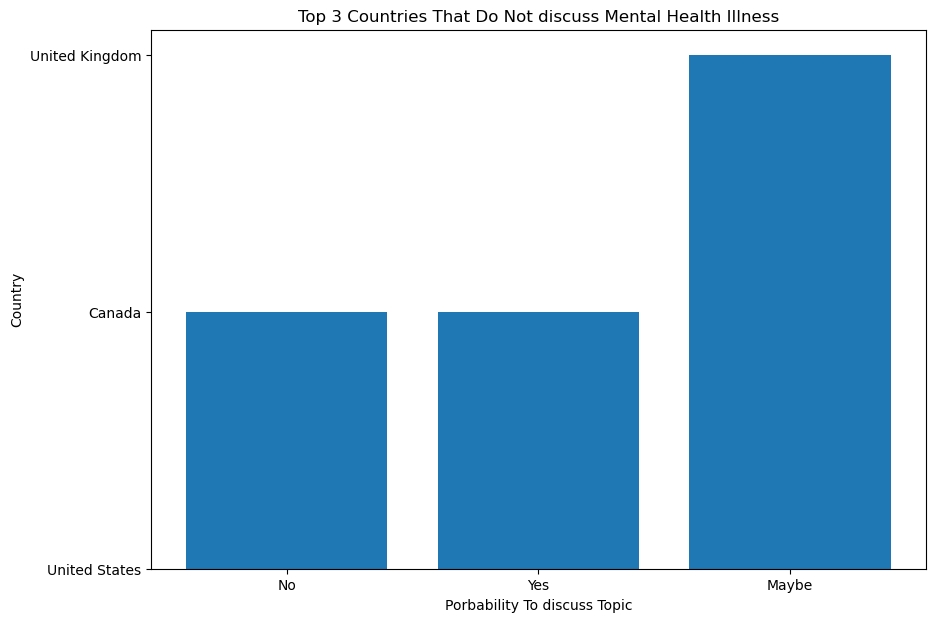

In [20]:
data = pd.read_csv("C:/Users/odunz/Downloads/Project 3/listupdate.csv")
data.head()
df = pd.DataFrame(data)
 
Country = df['Mental Health Interview'].head(12)
Mental_physical_df = df['Country'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Country[0:10], Mental_physical_df[0:10])
plt.title('Top 3 Countries That Do Not discuss Mental Health Illness')
plt.xlabel('Porbability To discuss Topic')
plt.ylabel('Country')
# Show Plot
plt.show()

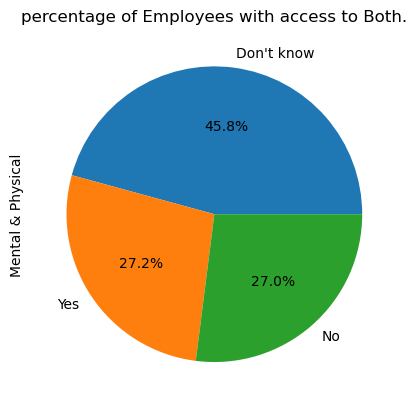

In [21]:
mental_physical_df = year_condition_df["Mental & Physical"].value_counts()
plt.title("percentage of Employees with access to Both.")
mental_physical_df.plot.pie(autopct= "%1.1f%%")
plt.show()


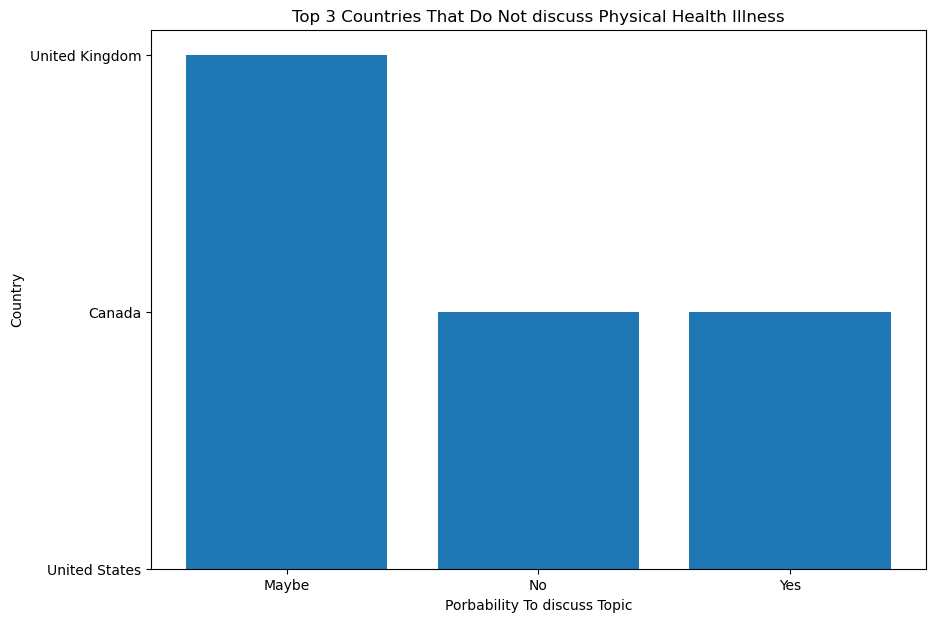

In [22]:
data = pd.read_csv("C:/Users/odunz/Downloads/Project 3/listupdate.csv")
data.head()
df = pd.DataFrame(data)
 
Country = df['Physical Health Interview'].head(12)
Mental_physical_df = df['Country'].head(12)
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Country[0:10], Mental_physical_df[0:10])
plt.title('Top 3 Countries That Do Not discuss Physical Health Illness')
plt.xlabel('Porbability To discuss Topic')
plt.ylabel('Country')
# Show Plot
plt.show()

In [23]:
conditions_df = data[["# of Employees","Mental Health Interview"]]
conditions_df.head()

,# of Employees,Mental Health Interview
0,6-25,No
1,More than 1000,No
2,6-25,Yes
3,26-100,Maybe
4,100-500,Yes


In [24]:
table_df = sm.stats.Table.from_data(conditions_df)
print(table_df.table_orig)

Mental Health Interview  Maybe   No  Yes
# of Employees                          
1-5                         31  121   10
100-500                     26  144    6
26-100                      52  225   12
500-1000                     7   51    2
6-25                        66  216    8
More than 1000              25  251    6


In [25]:
conditions2_df = data[["Country","Mental & Physical"]]
conditions2_df.head()

,Country,Mental & Physical
0,United States,Yes
1,United States,Don't know
2,Canada,No
3,United Kingdom,No
4,United States,Don't know


In [26]:
table_df2 = sm.stats.Table.from_data(conditions2_df)
print(table_df2.table_orig)

Mental & Physical       Don't know   No  Yes
Country                                     
Australia                        6    8    7
Austria                          1    0    2
Bahamas, The                     0    0    1
Belgium                          5    1    0
Bosnia and Herzegovina           1    0    0
Brazil                           4    2    0
Bulgaria                         3    1    0
Canada                          33   20   19
China                            1    0    0
Colombia                         1    0    1
Costa Rica                       0    1    0
Croatia                          0    1    1
Czech Republic                   1    0    0
Denmark                          0    0    2
Finland                          3    0    0
France                           6    4    3
Georgia                          0    1    0
Germany                         19    9   17
Greece                           1    1    0
Hungary                          0    1    0
India     